In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              891 non-null    int64  
 1   Survived                 891 non-null    int64  
 2   Pclass                   891 non-null    int64  
 3   Name                     891 non-null    object 
 4   Sex                      891 non-null    object 
 5   Age                      714 non-null    float64
 6   Siblings/Spouses Aboard  891 non-null    int64  
 7   Parents/Children Aboard  891 non-null    int64  
 8   Ticket                   891 non-null    object 
 9   Fare                     891 non-null    float64
 10  Cabin                    204 non-null    object 
 11  Embarked                 889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df['Family Size'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1

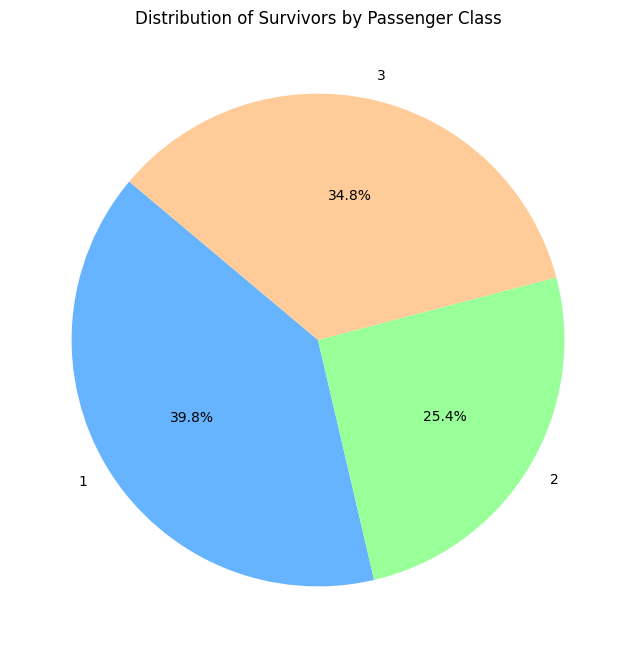

In [19]:
df_survived_PClass=df.loc[df['Survived']==True,['Pclass']].groupby('Pclass').size()
plt.figure(figsize=(8, 8))
plt.pie(df_survived_PClass, labels=df_survived_PClass.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Survivors by Passenger Class')
plt.show()

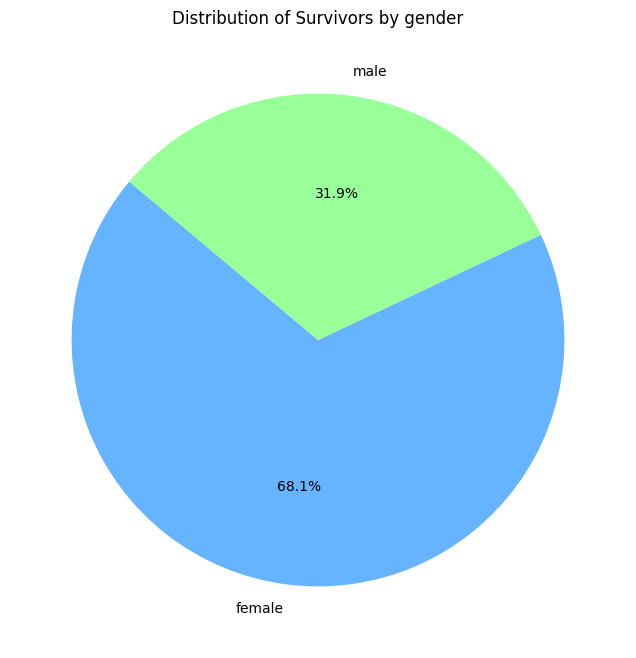

In [7]:
df_survived_Gender=df.loc[df['Survived']==True,['Sex']].groupby('Sex').size()
plt.figure(figsize=(8, 8))
plt.pie(df_survived_Gender, labels=df_survived_Gender.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Survivors by gender')
plt.show()

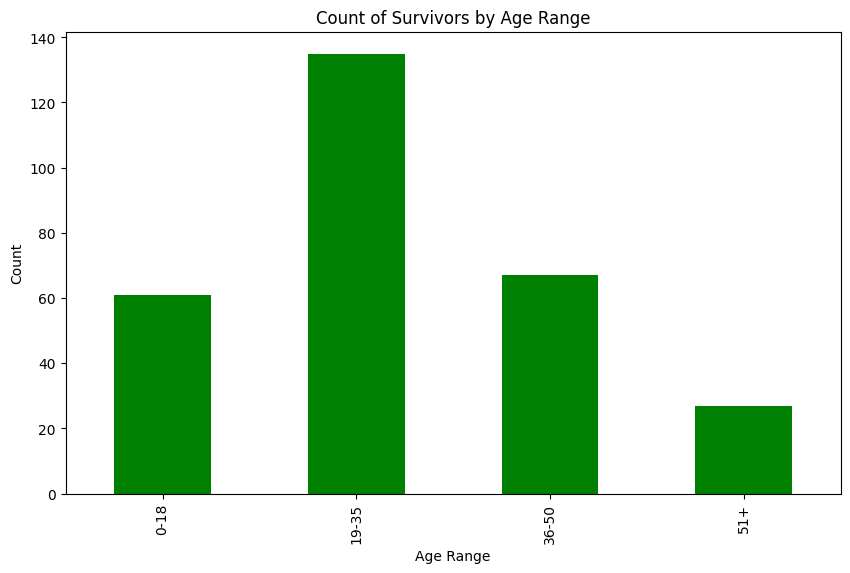

In [8]:
# Define age ranges
age_bins = [0, 18, 35, 50, 100]
age_labels = ['0-18', '19-35', '36-50', '51+']

# Create a new column 'AgeRange' based on the defined bins
df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Filter the DataFrame to include only survivors
survived_df = df[df['Survived'] == 1]

# Plotting a bar chart for Survivors by Age Range
plt.figure(figsize=(10, 6))
survived_df['AgeRange'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Count of Survivors by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

/var/folders/6p/6141b1wj2rj4p5j52qdvcmsc0000gp/T/ipykernel_3125/3139591576.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_df.groupby(['Sex', 'AgeRange']).size().plot(kind='pie')


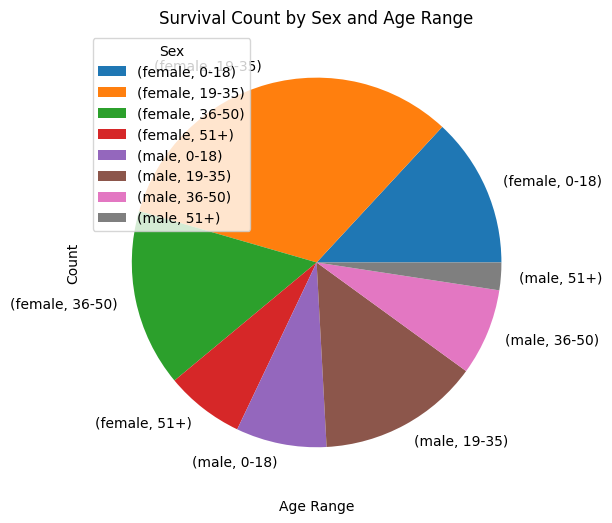

In [9]:
# Plotting a bar chart for Survivors by Sex and Age Range
plt.figure(figsize=(12, 6))
survived_df.groupby(['Sex', 'AgeRange']).size().plot(kind='pie')
plt.title('Survival Count by Sex and Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper left')
plt.show()

/var/folders/6p/6141b1wj2rj4p5j52qdvcmsc0000gp/T/ipykernel_3125/980858592.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None)


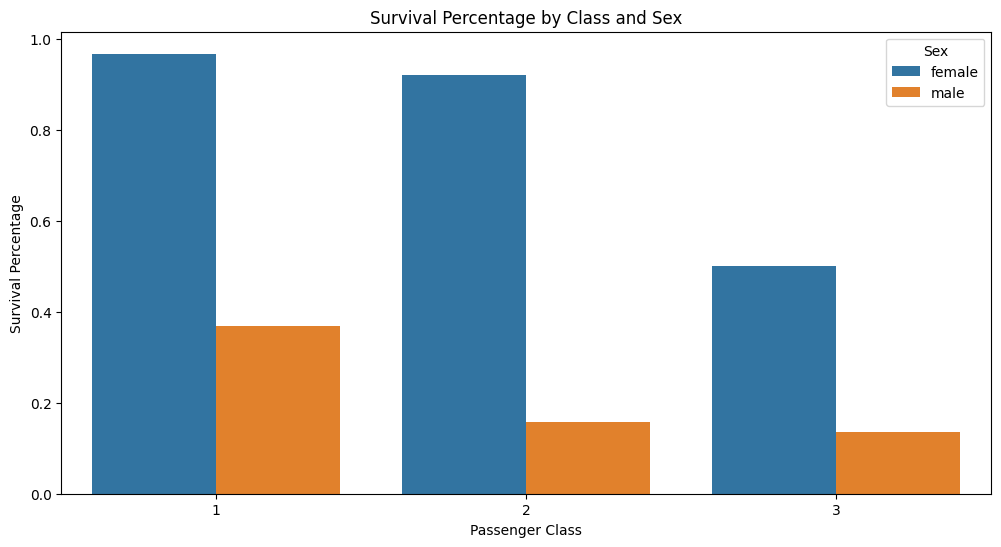

In [10]:
# Plotting a bar chart for survival percentage by class and sex using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None)
plt.title('Survival Percentage by Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage')
plt.show()

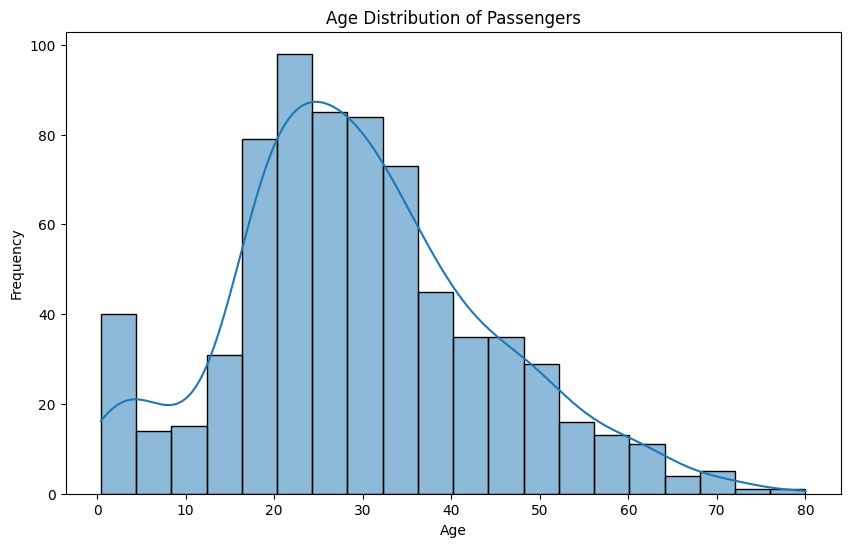

In [11]:
# Plotting a histogram for the age distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

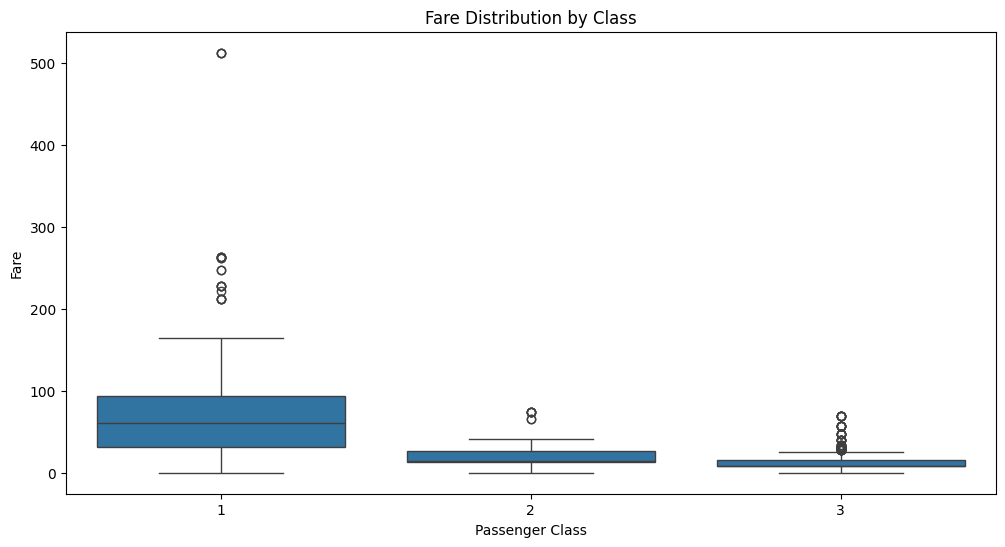

In [12]:
# Plotting a boxplot for fare distribution by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

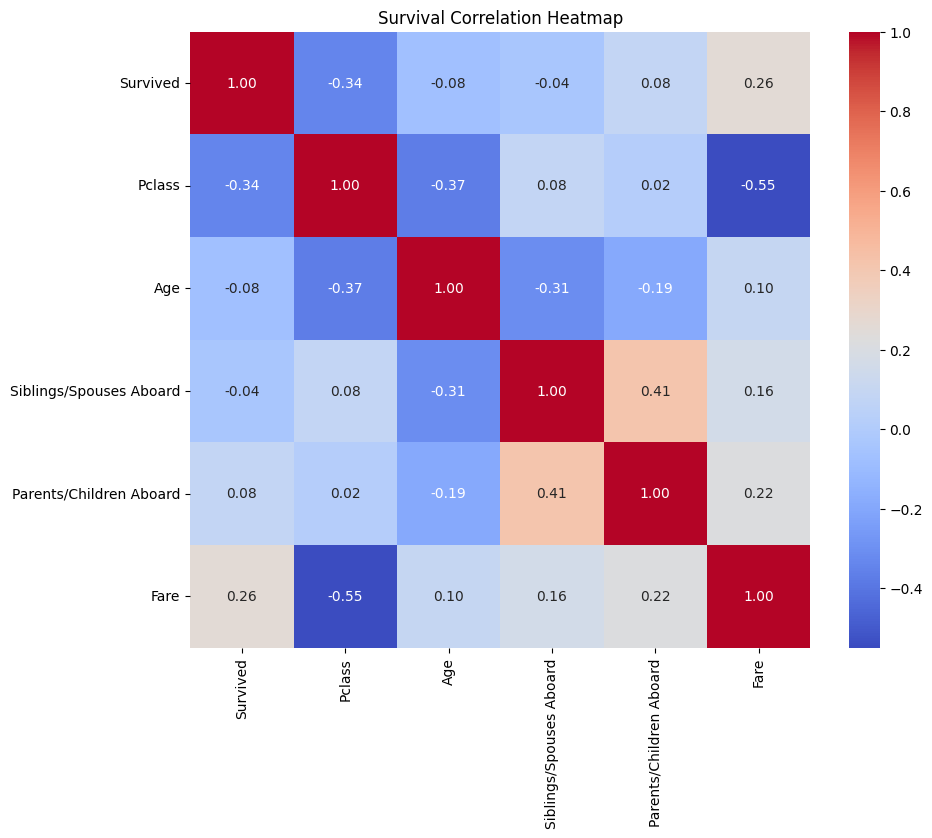

In [13]:
# Creating a survival heatmap
plt.figure(figsize=(10, 8))
survival_corr = df[['Survived', 'Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']].corr()
sns.heatmap(survival_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Survival Correlation Heatmap')
plt.show()